In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import my_module as kyd

In [2]:
# Load and read data
# path= '/content/drive/MyDrive/MyProjects/ML Projects/Unsupervised ML/BookRecommendationSystem/data/Ratings.csv'
path='./data/Ratings.csv'
df= pd.read_csv(path)
df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
# Function displays shape, duplicates count and list of columns
kyd.knowYourData(df)

Shape:  (1149780, 3)
Duplicates count:  0
Columns:
['User-ID', 'ISBN', 'Book-Rating']


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
# Describe
df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [6]:
# Unique
print(df.nunique())

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


In [7]:
# Unique value for Book-Rating
print(df['Book-Rating'].unique())

[ 0  5  3  6  8  7 10  9  4  1  2]


In [8]:
# Null/ Missing
df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### Data Description
1. shape : (1149780, 3) without duplicates row and missing values.
2. User-ID is the unique identification for the users who gave the rating.
3. ISBN is the book id on which the rating was given
4. Book-Rating is the rating given by user.

### Preprocessing

In [9]:
rating_count= df['User-ID'].value_counts().sort_values(ascending=False).reset_index()
book_reader= rating_count[rating_count['count']>=50]
good_readers = df[df['User-ID'].isin(book_reader['User-ID'])]

In [10]:
isbn_count= df['ISBN'].value_counts().reset_index()
famous_book= isbn_count[isbn_count['count'] >= 50]
good_books_n_readers= good_readers[good_readers['ISBN'].isin(famous_book['ISBN'])]

In [11]:
good_books_n_readers

,User-ID,ISBN,Book-Rating
173,276847,0446364193,0
182,276847,3426029553,8
413,276925,002542730X,10
426,276925,0316666343,0
427,276925,0345391810,0
...,...,...,...
1149714,276688,0553575090,7
1149715,276688,0553575104,6
1149724,276688,0679459618,0
1149726,276688,0679751521,0


1. Here we are considering only those users who voted on more than 100 books and those books who got more than 50 rating counts.

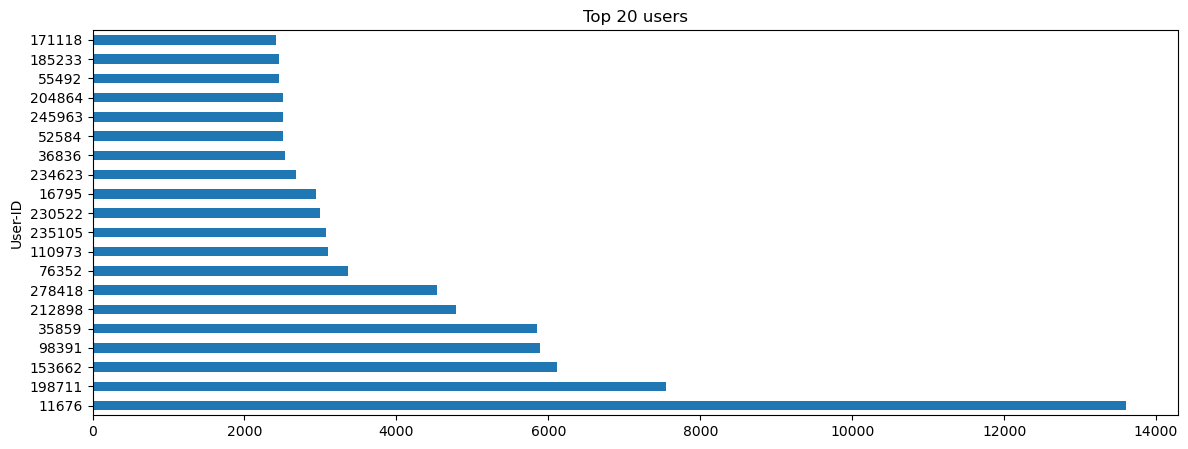

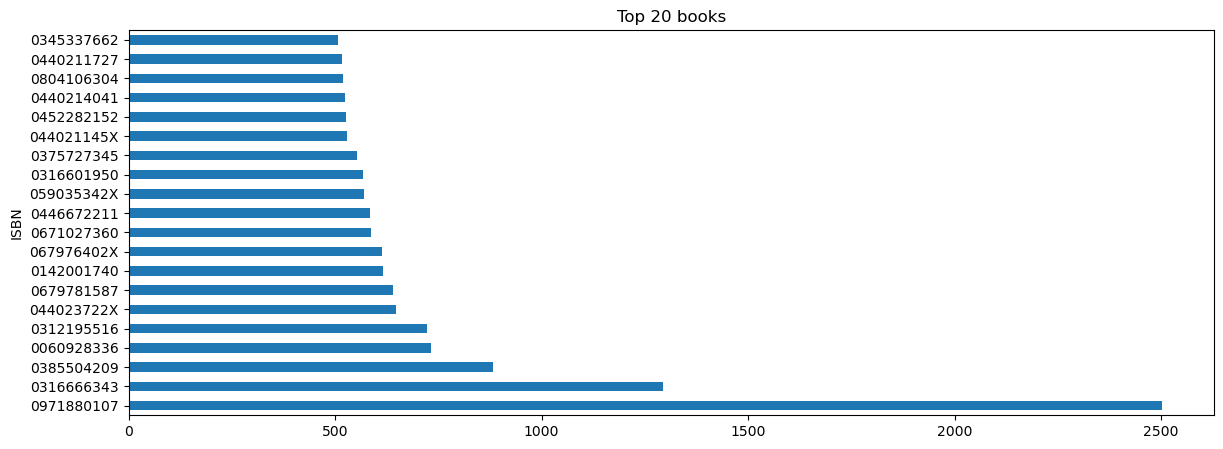

In [12]:
plt.rcParams['figure.figsize']=(14,5)
top20users= df["User-ID"].value_counts().sort_values(ascending=False).head(20)
top20books= df["ISBN"].value_counts().sort_values(ascending=False).head(20)
top20users.plot.barh()
plt.title('Top 20 users')
plt.show()
top20books.plot.barh()
plt.title('Top 20 books')
plt.show()

In [13]:
print('Top 20 users: ')
print(top20users.reset_index().T)
print()
print('Top 20 books :')
print(top20books.reset_index().T)

Top 20 users: 
            0       1       2      3      4       5       6      7       8   \
User-ID  11676  198711  153662  98391  35859  212898  278418  76352  110973   
count    13602    7550    6109   5891   5850    4785    4533   3367    3100   

             9       10     11      12     13     14      15      16     17  \
User-ID  235105  230522  16795  234623  36836  52584  245963  204864  55492   
count      3067    2991   2948    2674   2529   2512    2507    2504   2459   

             18      19  
User-ID  185233  171118  
count      2448    2421  

Top 20 books :
               0           1           2           3           4           5   \
ISBN   0971880107  0316666343  0385504209  0060928336  0312195516  044023722X   
count        2502        1295         883         732         723         647   

               6           7           8           9           10          11  \
ISBN   0679781587  0142001740  067976402X  0671027360  0446672211  059035342X   
count    

In [14]:
good_books_n_readers.to_csv('./preprocessed_data/preprocessed_rating.csv')